# 7 ベイズA/Bテスト

In [9]:
using Distributions
using Plots

In [1]:
visitors_to_A = 1300
visitors_to_B = 1275

convertions_from_A = 120
convertions_from_B = 125

125

In [6]:
alpha_prior = 1
beta_prior = 1

posterior_A = Beta(alpha_prior + convertions_from_A, beta_prior + visitors_to_A - convertions_from_A)
posterior_B = Beta(alpha_prior + convertions_from_B, beta_prior + visitors_to_B - convertions_from_B)

Beta{Float64}(α=126.0, β=1151.0)

In [8]:
samples = 20000
samples_posterior_A = rand(posterior_A, samples)
samples_posterior_B = rand(posterior_B, samples)

mean(samples_posterior_A .> samples_posterior_B)

0.3104

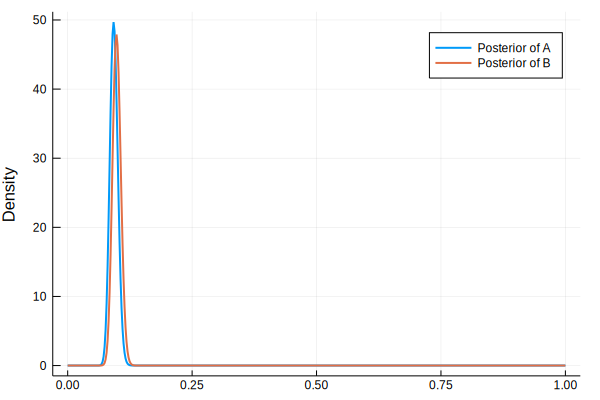

In [12]:
x = range(0, stop = 1, length = 500)
plot(x, pdf.(posterior_A, x), linewidth = 2, label = "Posterior of A", ylabel = "Density")
plot!(x, pdf.(posterior_B, x), linewidth = 2, label = "Posterior of B")

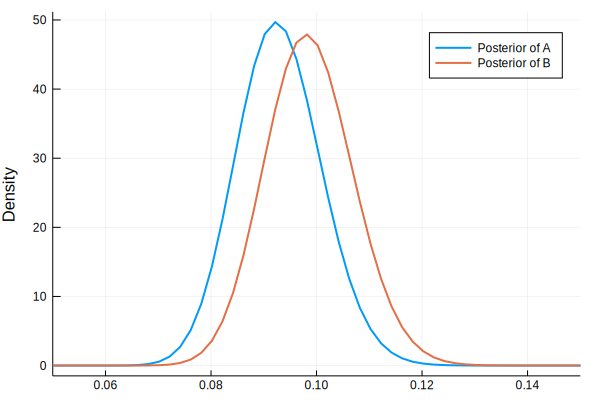

In [13]:
plot(x, pdf.(posterior_A, x), linewidth = 2, label = "Posterior of A", ylabel = "Density", xlims = (0.05, 0.15))
plot!(x, pdf.(posterior_B, x), linewidth = 2, label = "Posterior of B")

In [16]:
P = [0.5, 0.2, 0.3]
N = 1
rand(Multinomial(N, P))

3-element Array{Int64,1}:
 1
 0
 0

In [17]:
N = 10
rand(Multinomial(N, P))

3-element Array{Int64,1}:
 7
 1
 2

In [21]:
sample = rand(Dirichlet([1, 1]))
println(sample)
println(sum(sample))

[0.0263621, 0.973638]
0.9999999999999999


In [22]:
sample = rand(Dirichlet([1, 1, 1, 1]))
println(sample)
println(sum(sample))

[0.09125, 0.474582, 0.140758, 0.29341]
1.0


In [31]:
N = 1000
N_79 = 10
N_49 = 46
N_25 = 80
N_0 = N - (N_79 + N_49 + N_25)

obs = [N_79, N_49, N_25, N_0]
prior_parameters = [1, 1, 1, 1]
posterior_samples = rand(Dirichlet(prior_parameters + obs), 10000)
println(posterior_samples[:, 1])
println(posterior_samples[:, 2])

[0.00794628, 0.0403616, 0.0798031, 0.871889]
[0.00967538, 0.0419177, 0.0912494, 0.857158]


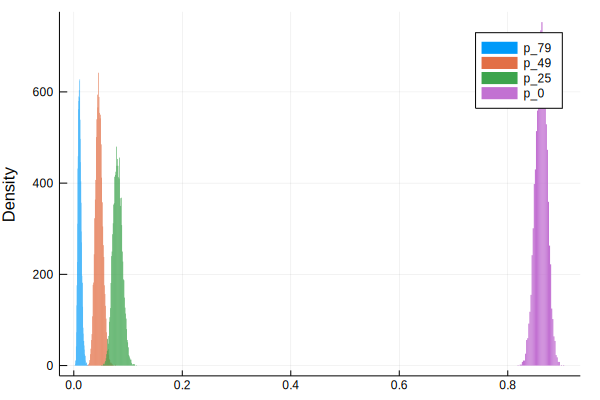

In [38]:
plt = plot(ylabel = "Density")
for (i, label) in enumerate(["p_79", "p_49", "p_25", "p_0"])
     histogram!(posterior_samples[i, :], linewidth = 0, label = label)
end
plt